In [ ]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [4]:
pred_path = '../_predictions.json'

In [5]:
with open(pred_path) as f:
  data = json.load(f)

In [6]:
data

[{'image_id': 298251,
  'category_id': 24,
  'bbox': [70.438, 90.375, 66.062, 43.75],
  'score': 0.90137},
 {'image_id': 298251,
  'category_id': 24,
  'bbox': [521.0, 105.25, 42.0, 40.25],
  'score': 0.85645},
 {'image_id': 298251,
  'category_id': 24,
  'bbox': [560.5, 62.25, 24.0, 40.25],
  'score': 0.77295},
 {'image_id': 298251,
  'category_id': 24,
  'bbox': [256.0, 44.25, 40.0, 37.25],
  'score': 0.5835},
 {'image_id': 298251,
  'category_id': 24,
  'bbox': [504.5, 81.125, 17.0, 28.75],
  'score': 0.48022},
 {'image_id': 298251,
  'category_id': 24,
  'bbox': [377.75, 64.5, 19.0, 36.25],
  'score': 0.47754},
 {'image_id': 298251,
  'category_id': 24,
  'bbox': [256.0, 44.25, 26.0, 36.5],
  'score': 0.43262},
 {'image_id': 298251,
  'category_id': 24,
  'bbox': [183.375, 77.875, 21.5, 15.5],
  'score': 0.38232},
 {'image_id': 298251,
  'category_id': 16,
  'bbox': [417.25, 108.5, 49.5, 17.5],
  'score': 0.13574},
 {'image_id': 298251,
  'category_id': 24,
  'bbox': [416.75, 108.3

In [8]:
areas = []
scores = []
for item in data:
  bbox = item['bbox']
  x,y,ht,wd = bbox
  areas.append(ht*wd)
  score = item['score']
  scores.append(score)


In [11]:
areas = np.array(areas)
scores = np.array(scores)

In [20]:
sample_areas = np.random.choice(areas, 100)
sample_scores = np.random.choice(scores, 100)

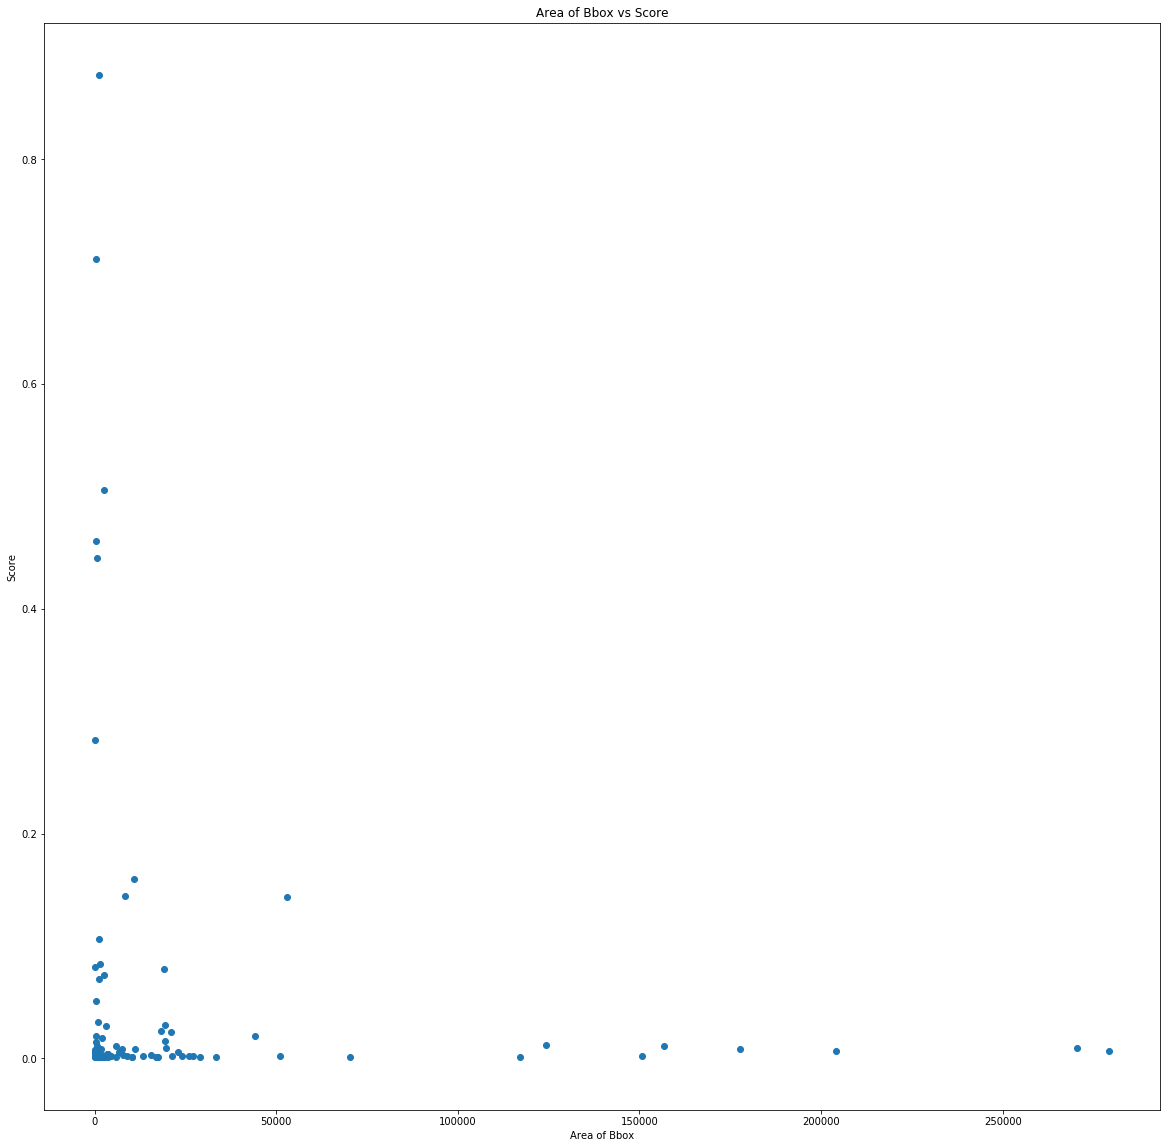

<Figure size 432x288 with 0 Axes>

In [21]:
plt.figure(figsize=(20,20))
plt.title('Area of Bbox vs Score')
plt.xlabel('Area of Bbox')
plt.ylabel('Score')
plt.scatter(sample_areas, sample_scores)
plt.show()
plt.savefig('./areavsscore.png')